# Importing the necessary libraries

In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from matplotlib import pyplot

# Reading the csv file

In [2]:
# reading the csv file

df = pd.read_csv("data/dermatology_data.data")

# We tried to insert the columns directly into the csv file in our local host, but when opened the file in excel, the excel is filling the unknown or empty cellswith zeros(0). So we are expilcitly coding the columns in the code.

In [3]:
#columns

"""We tried to insert the columns directly into the csv file in our local host,
   but when opened the file in excel, the excel is filling the unknown or empty cells
   with zeros(0).
   So we are expilcitly coding the columns in the code.
"""

df.columns = ['erythema', 'scaling', 'definite borders', 'itching',
       'koebner phenomenon', 'polygonal papules', 'follicular papules',
       'oral mucosal involvement', 'knee and elbow involvement',
       'scalp involvement', 'family history', 'melanin incontinence',
       'eosinophils in the infiltrate', 'PNL infiltrate',
       'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges',
       'elongation of the rete ridges',
       'thinning of the suprapapillary epidermis', 'spongiform pustule',
       'munro microabcess', 'focal hypergranulosis',
       'disappearance of the granular layer',
       'vacuolisation and damage of basal layer', 'spongiosis',
       'saw-tooth appearance of retes', 'follicular horn plug',
       'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate',
       'band-like infiltrate', 'Age', 'Class Code']

In [4]:
df.describe

<bound method NDFrame.describe of      erythema  scaling  definite borders  itching  koebner phenomenon  \
0           3        3                 3        2                   1   
1           2        1                 2        3                   1   
2           2        2                 2        0                   0   
3           2        3                 2        2                   2   
4           2        3                 2        0                   0   
..        ...      ...               ...      ...                 ...   
360         2        1                 1        0                   1   
361         3        2                 1        0                   1   
362         3        2                 2        2                   3   
363         2        1                 3        1                   2   
364         3        2                 2        0                   0   

     polygonal papules  follicular papules  oral mucosal involvement  \
0                

In [5]:
df.dtypes

erythema                                     int64
scaling                                      int64
definite borders                             int64
itching                                      int64
koebner phenomenon                           int64
polygonal papules                            int64
follicular papules                           int64
oral mucosal involvement                     int64
knee and elbow involvement                   int64
scalp involvement                            int64
family history                               int64
melanin incontinence                         int64
eosinophils in the infiltrate                int64
PNL infiltrate                               int64
fibrosis of the papillary dermis             int64
exocytosis                                   int64
acanthosis                                   int64
hyperkeratosis                               int64
parakeratosis                                int64
clubbing of the rete ridges    

# Data Cleaning

## In the data source of the dataset (https://archive.ics.uci.edu/ml/datasets/Dermatology) itself      they provided that there are 8 missing values in 'Age' attribute.
## This data is part of an intensive research project. So, there nay not be a lot of missing data.

## We cannot afford to delete the rows where there are missing values and we cannot fill the        unknown values with mean or median or mode.
## So, we decided to train a linear regression model with a newdataset and predicted the               missing values.
## The newdataset was formed by dropping the rows where there are missing 'Age' values.

In [6]:
# Data Cleaning

"""
Link to the source of data : https://archive.ics.uci.edu/ml/datasets/Dermatology
In the resource itself they provided that there are 8 missing values in Age attribute.
This data is part of an intensive reasearch project.
So there may not be a lot of missing data.
"""

"""
Here I am using regression and I am training the model with all the attributes except 'Age'.
"""

df_copy = df.copy(deep=True)

list_of_indexes = []  # to strore the indexes where the data is '?'
count = 0 

for i in range(len(df_copy)):
    if(df_copy['Age'][i]=='?'):
        count = count + 1
        list_of_indexes.append(i)

print(count)
print(list_of_indexes)

8
[32, 33, 34, 35, 261, 262, 263, 264]


In [7]:
# finding the rows where there is missing data

df_copy[df_copy['Age'] == '?']

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,Class Code
32,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,?,1
33,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,4
34,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,2
35,2,1,2,3,2,3,0,2,0,0,...,0,2,0,2,0,0,0,3,?,3
261,2,1,0,2,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5
262,1,1,1,3,0,0,0,0,0,0,...,0,0,3,0,0,0,2,0,?,5
263,1,1,0,2,0,0,0,0,1,0,...,0,0,2,0,0,0,3,0,?,5
264,1,1,0,3,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5


In [8]:
# dropping the columns from the deep copy of the df to train the model

for i in range(len(df_copy)):
    if(df_copy['Age'][i]=='?'):
        df_copy.drop(i, axis=0, inplace=True)

In [9]:
# ensuring the data was cleaned

df_copy[df_copy['Age'] == '?']

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,Class Code


In [10]:
x = df_copy.drop('Age', axis=1) # x -> dataframe without 'Age' attribute
y = df_copy['Age'] # y -> dataframe with just the 'Age' attribute

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = LinearRegression(fit_intercept=True) # defining the linear regression model
model.fit(x,y) # training the model with the cleaned data

LinearRegression()

### Note : In the below code we are pushing the data into the dataframe, the code gives a warning (Not error).
### Code is working fine, we are checking weather the code worked or not in the following cell.
### In the following cell we are predicting the values and pushing it into the dataframe.

In [11]:
x_df = df.drop('Age', axis=1).values.reshape(-1,1)
y_df = df['Age']


#predicted_values = model.predict(x_df)

list_of_predicted_values = []

for idx, row in df[df["Age"] == "?"].iterrows():
    x = df.iloc[idx, list(range(33))+[34]]
    age = int (model.predict([x])[0])
    list_of_predicted_values.append([idx, age])
    df.iloc[idx, 33] = age

/home/dheeraj/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/dheeraj/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/dheeraj/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/dheeraj/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/dheeraj/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/dheeraj/.local/lib/python3.8/site-packages/sklearn/bas

### Code worked fine and generated the results

In [12]:
list_of_predicted_values # Predicted values by the model along with the row numbers

[[32, 38],
 [33, 34],
 [34, 36],
 [35, 34],
 [261, 37],
 [262, 40],
 [263, 39],
 [264, 36]]

## The dataset consists of different set of attributes (Clinical and Histopathological)

### Selecting the clinical data attributes and creating a clinical dataframe

In [13]:
# The data consists of different set of attributes
# One is clinical attributes and second is histopathological attributes

# Selecting the clinical data attributes and creating the clinical dataframe

clinical_df = df[['erythema', 'scaling', 'definite borders', 'itching',
       'koebner phenomenon', 'polygonal papules', 'follicular papules',
       'oral mucosal involvement', 'knee and elbow involvement',
       'scalp involvement', 'family history', 'Age']]

### Selecting the histopathological data attributes and creating a histopathalogical dataframe

In [14]:
# Selecting the histopathological data attributes and creating the histopathological dataframe

histopathological_df = df[['melanin incontinence',
       'eosinophils in the infiltrate', 'PNL infiltrate',
       'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges',
       'elongation of the rete ridges',
       'thinning of the suprapapillary epidermis', 'spongiform pustule',
       'munro microabcess', 'focal hypergranulosis',
       'disappearance of the granular layer',
       'vacuolisation and damage of basal layer', 'spongiosis',
       'saw-tooth appearance of retes', 'follicular horn plug',
       'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate',
       'band-like infiltrate']]

In [15]:
clinical_df.describe

<bound method NDFrame.describe of      erythema  scaling  definite borders  itching  koebner phenomenon  \
0           3        3                 3        2                   1   
1           2        1                 2        3                   1   
2           2        2                 2        0                   0   
3           2        3                 2        2                   2   
4           2        3                 2        0                   0   
..        ...      ...               ...      ...                 ...   
360         2        1                 1        0                   1   
361         3        2                 1        0                   1   
362         3        2                 2        2                   3   
363         2        1                 3        1                   2   
364         3        2                 2        0                   0   

     polygonal papules  follicular papules  oral mucosal involvement  \
0                

In [16]:
histopathological_df.describe

<bound method NDFrame.describe of      melanin incontinence  eosinophils in the infiltrate  PNL infiltrate  \
0                       0                              0               1   
1                       1                              0               0   
2                       0                              0               3   
3                       1                              0               0   
4                       0                              2               1   
..                    ...                            ...             ...   
360                     0                              0               1   
361                     0                              0               0   
362                     2                              2               0   
363                     2                              0               0   
364                     0                              0               1   

     fibrosis of the papillary dermis  exocytosis  ac

## Isolating the class code

### Class code is something we want to predict.
### But the class code is already provided.
### We want to isolate the data so that we can verify the ouput data.

In [17]:
# Class code is something we want to predict
# But the class code is already provided 
# We want to isolate the data so that we can vrify the output data.

class_code = df['Class Code']

In [18]:
class_code.describe

<bound method NDFrame.describe of 0      1
1      3
2      1
3      3
4      2
      ..
360    4
361    4
362    3
363    3
364    1
Name: Class Code, Length: 365, dtype: int64>

## Splitting the data into training and testing data

In [19]:
x =  df.drop('Class Code', axis=1)
y = df['Class Code']
x_train, x_test, y_train, y_test= train_test_split(x,y, random_state=0, test_size=0.2)

In [20]:
print(x_train.shape)
print(x_test.shape)

(292, 34)
(73, 34)


In [21]:
y_test.shape

(73,)

# Clustering

## We are implementing KMeans, AffinityPropagation, MiniBatchKMeans, GaussianMixture

In [22]:
#Clustering

from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, MiniBatchKMeans
from sklearn.mixture import GaussianMixture

## K-Means Clustering

In [23]:
#K Means Clustering
# Source : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
kmeans = KMeans(n_clusters=6)

# Training the model
kmeans.fit(x_train)

# Predicting the results
classes = kmeans.predict(x_test)

# Accuracy Scores
print(accuracy_score(y_test, classes))

/home/dheeraj/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.1780821917808219


## MiniBatchKMeans

In [24]:
# Defining the model
# Source : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html
bkmeans = MiniBatchKMeans(n_clusters=6)

# Training the model
bkmeans.fit(x_train)

# Predicting the results
classes = bkmeans.predict(x_test)

# Accuracy Score
print(accuracy_score(y_test, classes))

0.1780821917808219


/home/dheeraj/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## AffinityPropagation

In [25]:
# Defining the model
# Source : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html
affprop = AffinityPropagation()

# Training the model
affprop.fit(x_train)

# Predicting the model
y_pred = affprop.predict(x_test)

# Accuracy Score
accuracy_score(y_test, y_pred)

0.1232876712328767

## GaussianMixture

In [26]:
# Defining the model
# Source : https://scikit-learn.org/stable/modules/mixture.html
gauss = GaussianMixture(n_components=6)

# Training the model
gauss.fit(x_train)

# Predicting the model
y_pred = gauss.predict(x_test)

# Accuracy Score
accuracy_score(y_test, y_pred)

0.1780821917808219

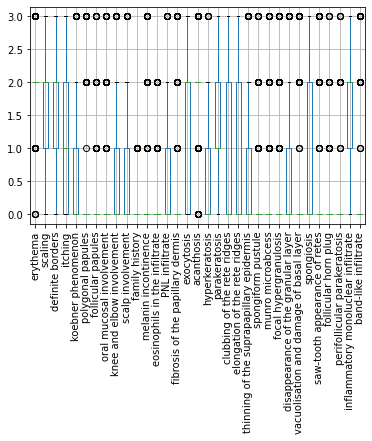

In [27]:
df.iloc[:,:-1].boxplot(rot=90)
plt.show()

In [28]:
def plot_clusters(model, title, df):
    fig, axs = plt.subplots(6, 6, figsize=(20,20))
    pred = model.predict(df)
    col_idx = 0
    cols = df.columns
    for i in range(6):
        for j in range(6):
            if(col_idx > 33):
                break
            axs[i,j].scatter(df.iloc[:,col_idx].values, pred, c=pred)
            axs[i,j].set_xlabel(cols[col_idx])
            axs[i,j].set_ylabel("Class Code")
            col_idx+=1

    # Hide unused subplots
    fig.delaxes(axs[5][4])
    fig.delaxes(axs[5][5])
    fig.suptitle(title)
    plt.show()

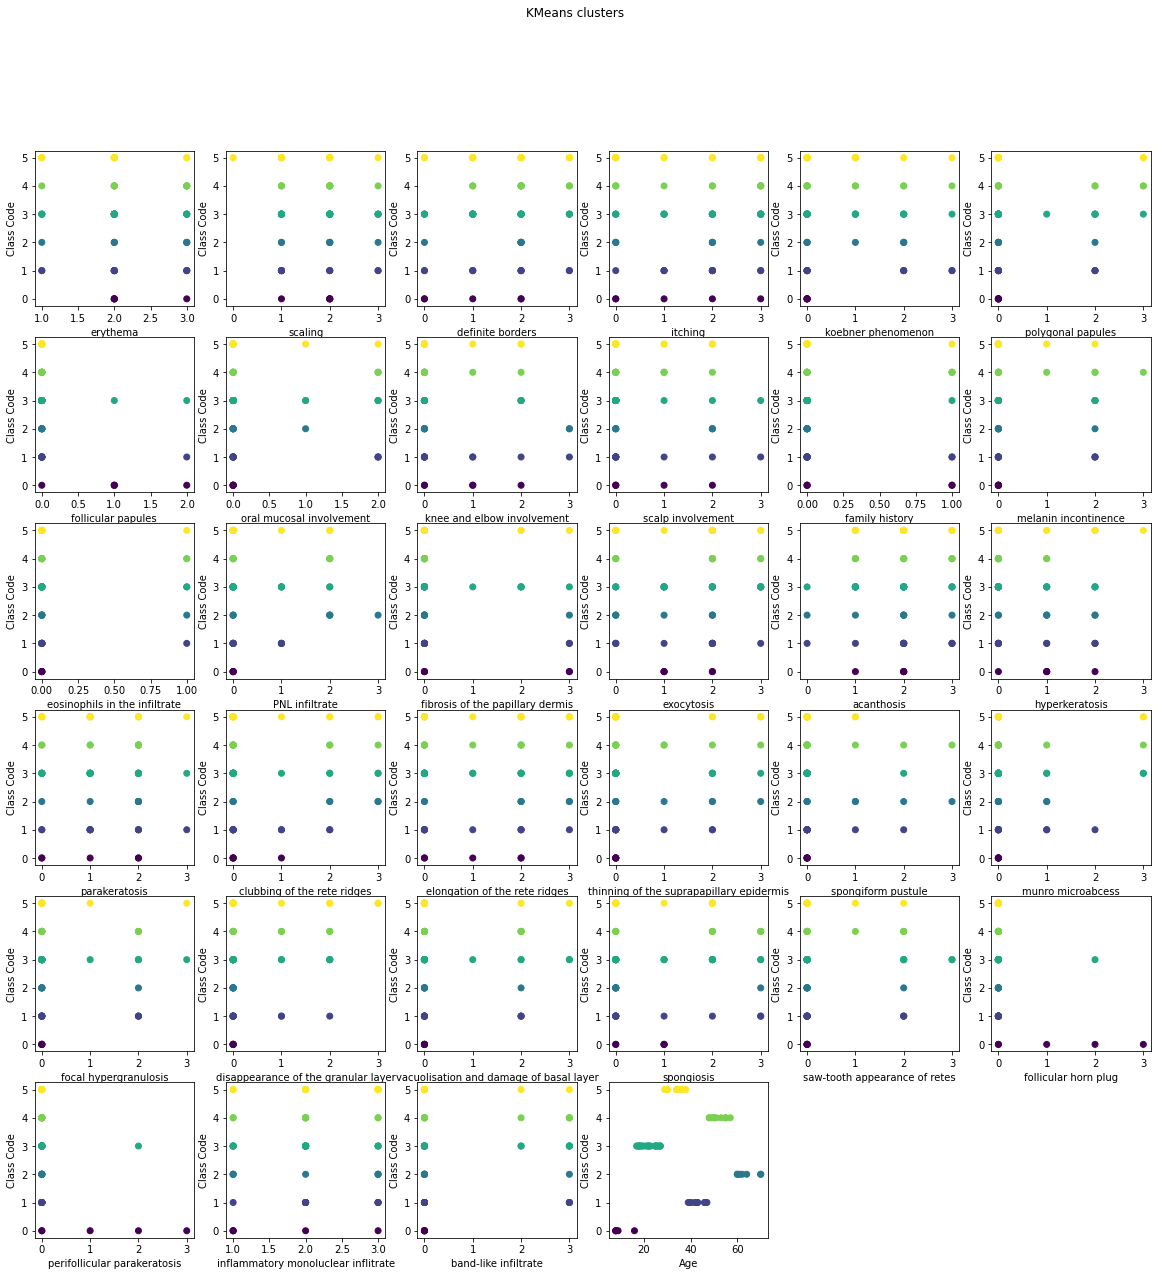

In [29]:
# Plotting the KMeans clusters
plot_clusters(kmeans, "KMeans clusters", x_test.astype(int))

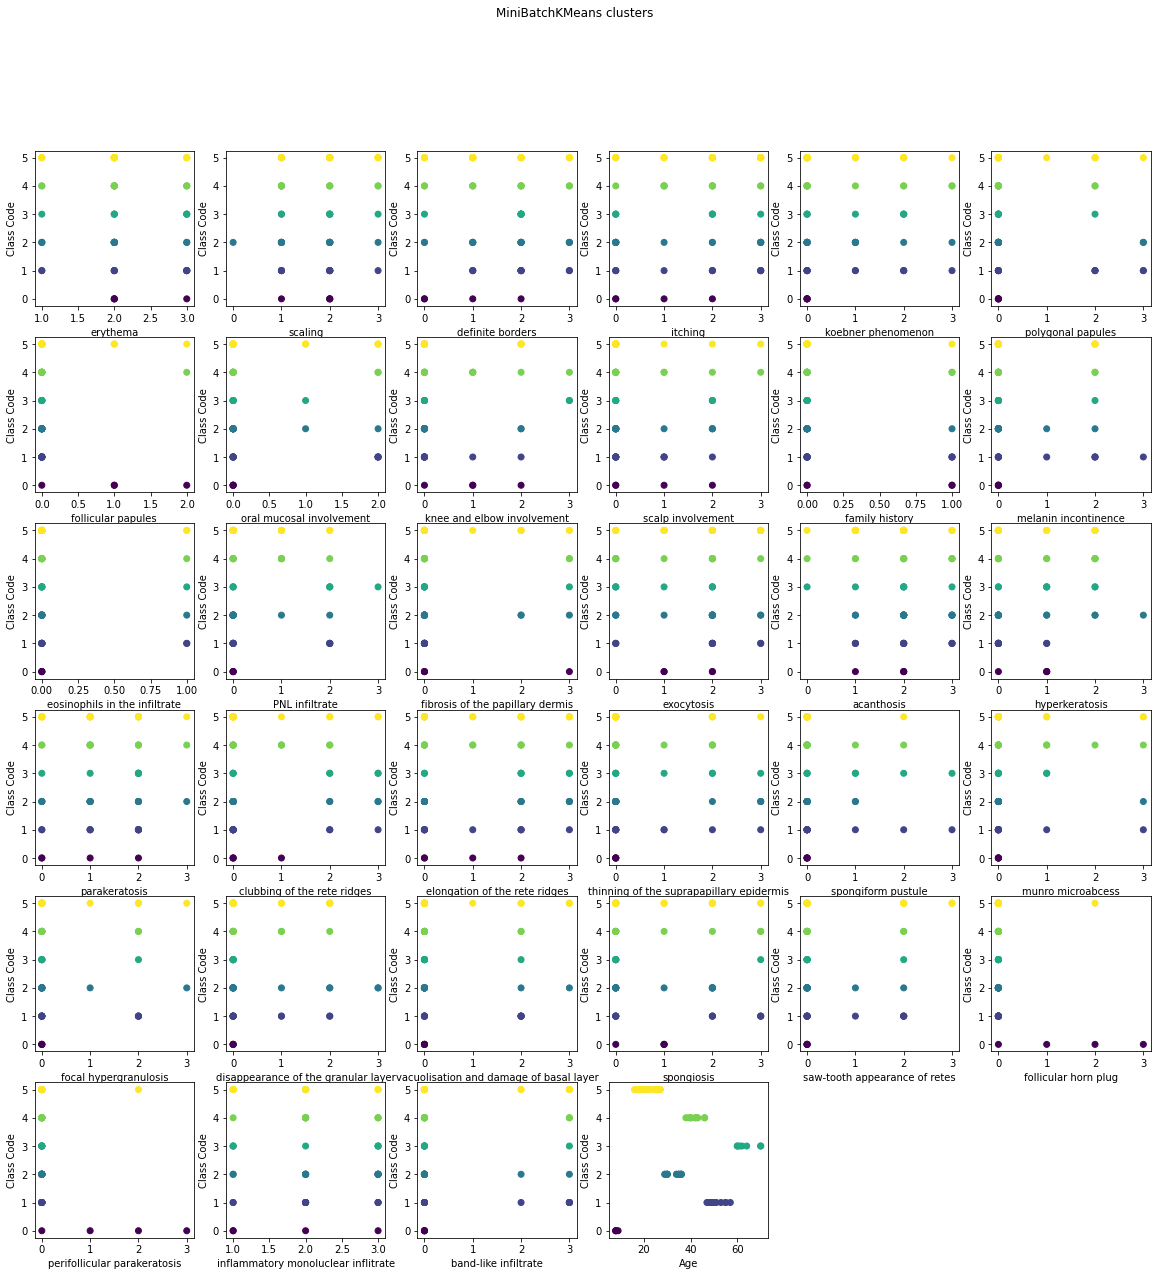

In [30]:
# Plotting the MiniBatchKMeans clusters
plot_clusters(bkmeans, "MiniBatchKMeans clusters", x_test.astype(int))

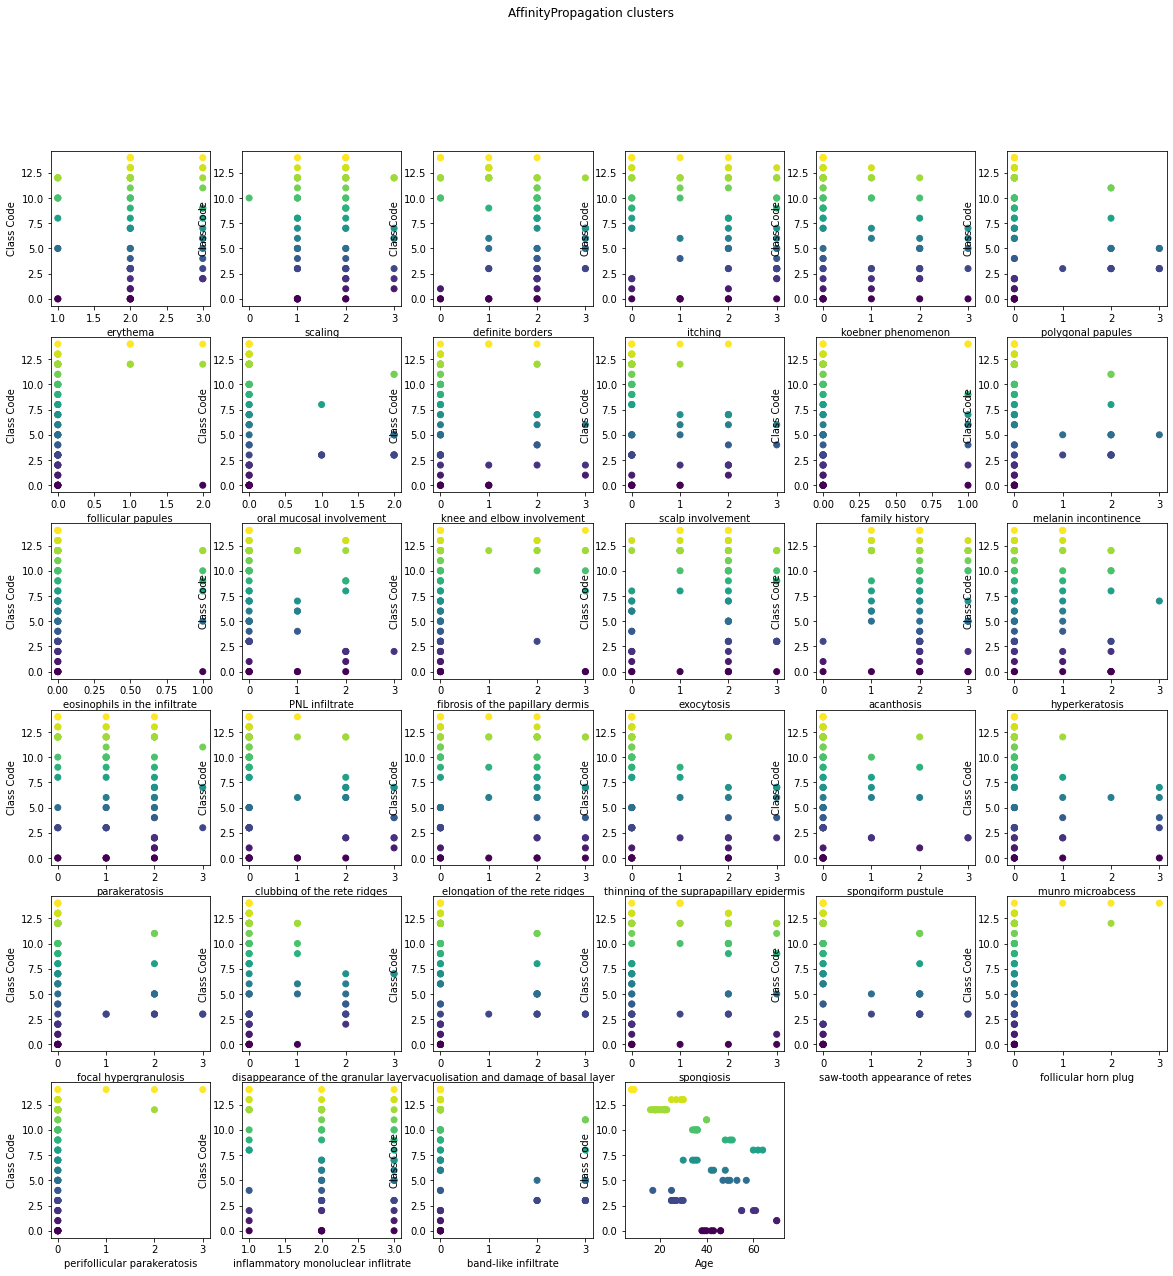

In [31]:
# Plotting the Affinity Propagation clusters
plot_clusters(affprop, "AffinityPropagation clusters", x_test.astype(int))

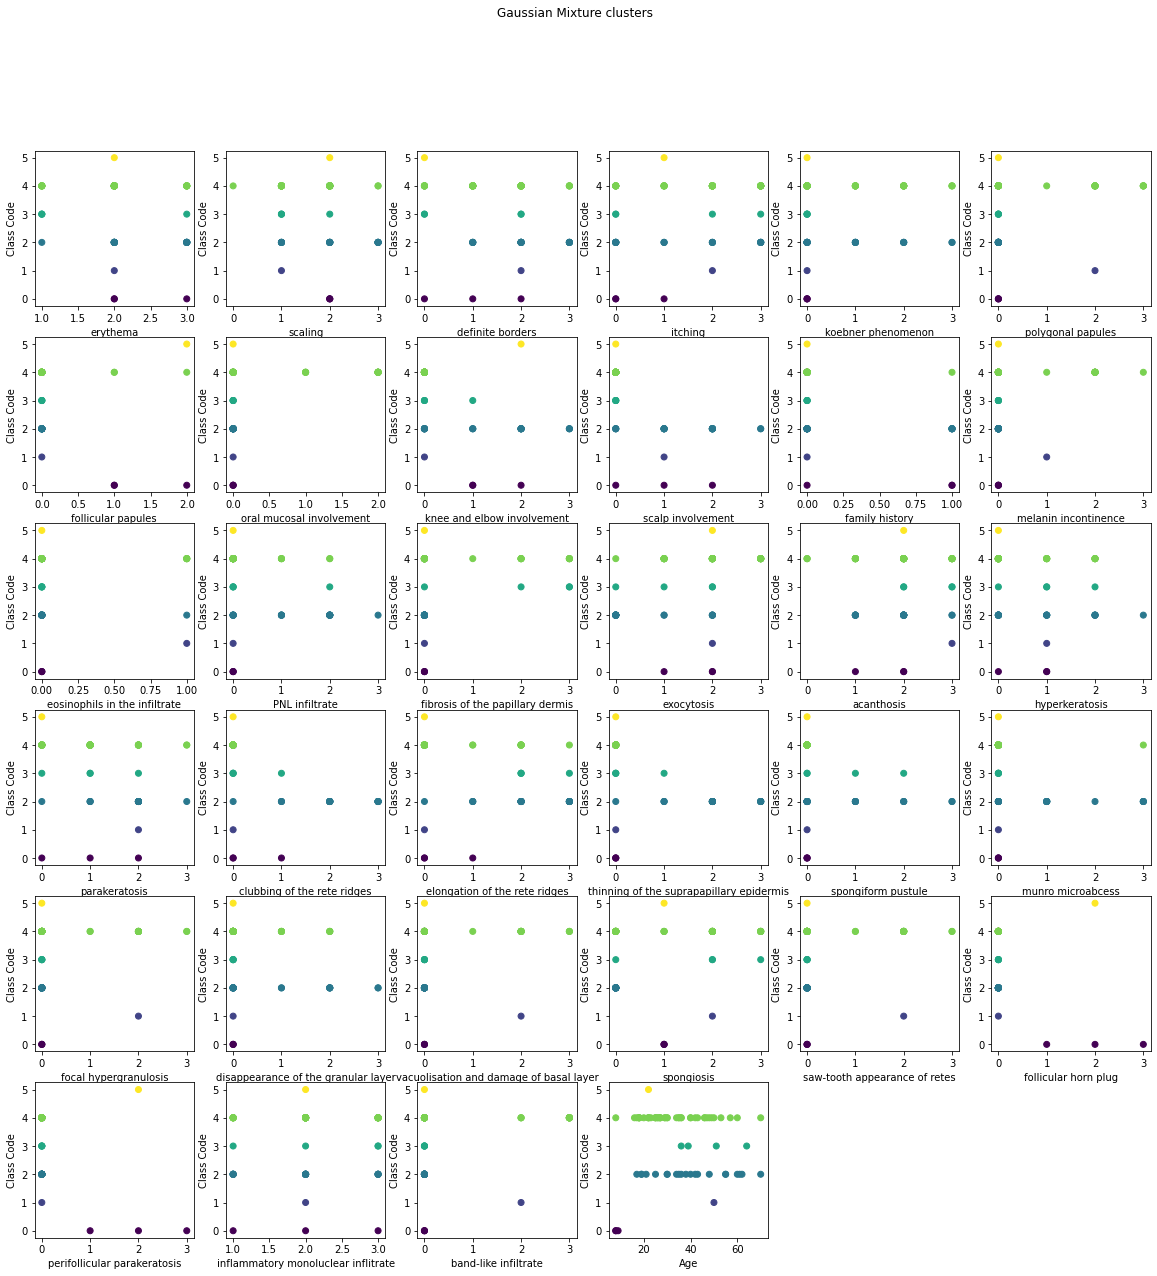

In [32]:
# Plotting the Gaussian Mixture clusters
plot_clusters(gauss, "Gaussian Mixture clusters", x_test.astype(int))